In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
raw_data = load_breast_cancer()
print(raw_data.keys())
df_x = pd.DataFrame(columns=raw_data['feature_names'], data=raw_data['data'])
df_x.head(3)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
target = raw_data['target']
raw_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
train_input, test_input, train_target, test_target = train_test_split(
    df_x, target, random_state=41, test_size=0.2)

In [5]:
scaler_mm = MinMaxScaler()
mm_train_input = scaler_mm.fit_transform(train_input)
mm_test_input = scaler_mm.transform(test_input)

scaler_std = StandardScaler()
std_train_input = scaler_std.fit_transform(train_input)
std_test_input = scaler_std.transform(test_input)

#스케일러x
case0 = LogisticRegression()
case0.fit(train_input, train_target)
print('case0 정규화x')
print('case0 trainData_accuracy : ', accuracy_score(case0.predict(train_input), train_target))
print('case0 testData_accuracy : ', accuracy_score(case0.predict(test_input), test_target))
print()

#MinMax
case1 = LogisticRegression()
case1.fit(mm_train_input, train_target)
print('case1 MinMax정규화')
print('case1 trainData_accuracy : ', accuracy_score(case1.predict(mm_train_input), train_target))
print('case1 testData_accuracy : ', accuracy_score(case1.predict(mm_test_input), test_target))
print()
#Standard
case2 = LogisticRegression()
case2.fit(std_train_input, train_target)
print('case2 Standard정규화')
print('case2 trainData_accuracy : ', accuracy_score(case2.predict(std_train_input), train_target))
print('case2 testData_accuracy : ', accuracy_score(case2.predict(std_test_input), test_target))
print()

case0 정규화x
case0 trainData_accuracy :  0.9384615384615385
case0 testData_accuracy :  0.9649122807017544

case1 MinMax정규화
case1 trainData_accuracy :  0.967032967032967
case1 testData_accuracy :  0.9824561403508771

case2 Standard정규화
case2 trainData_accuracy :  0.9846153846153847
case2 testData_accuracy :  1.0



In [12]:
axl =[]
amml = []
astdl = []

for i in range(1000):
    train_input, test_input, train_target, test_target = train_test_split(
    df_x, target, test_size=0.2)

    scaler_mm = MinMaxScaler()
    mm_train_input = scaler_mm.fit_transform(train_input)
    mm_test_input = scaler_mm.transform(test_input)

    scaler_std = StandardScaler()
    std_train_input = scaler_std.fit_transform(train_input)
    std_test_input = scaler_std.transform(test_input)

    #스케일러x
    case0 = LogisticRegression()
    case0.fit(train_input, train_target)
    ax = accuracy_score(case0.predict(test_input), test_target)

    #MinMax
    case1 = LogisticRegression()
    case1.fit(mm_train_input, train_target)
    amm = accuracy_score(case1.predict(mm_test_input), test_target)
    
    #Standard
    case2 = LogisticRegression()
    case2.fit(std_train_input, train_target)
    astd = accuracy_score(case2.predict(std_test_input), test_target)

    axl.append(ax)
    amml.append(amm)
    astdl.append(astd)

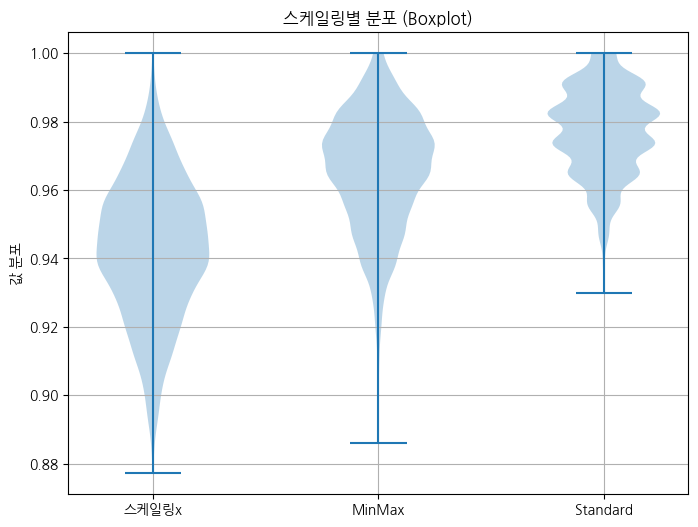

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf'
fontprop = fm.FontProperties(fname=path)

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 6))
plt.violinplot([axl, amml, astdl])
plt.xticks([1, 2, 3], ['스케일링x', 'MinMax', 'Standard'])
plt.ylabel('값 분포')
plt.title('스케일링별 분포 (Boxplot)')
plt.grid(True)
plt.show()
